In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt

In [2]:
# Make sure we're in the right directory
correct_directory = 'C:\\Users\\anear\\Desktop\\LiveScore_ML_Challenge\\LiveScore ML Challenge 4'
if os.getcwd() != correct_directory:
    os.chdir(correct_directory)
print('Current working directory: ', os.getcwd())

Current working directory:  C:\Users\anear\Desktop\LiveScore_ML_Challenge\LiveScore ML Challenge 4


In [3]:
# Load data files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Sample some sample data in train
train.head()

,Customer,Retained,CuRank,Name,Sex,Age,FriPlay,RelPlay,IT-Tag,Port,HighWin,AqChan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,8.0500,S


In [ ]:
# Show sample data in test
test.head()

In [4]:
# Missing data in training set
print('No. of customers with missing data by variable (training set)')
print('')
for variable in train.columns:
    print('{}: {} ({:.1f}%)'.format(variable, sum(train[variable].isna()), 100*sum(train[variable].isna())/len(train)))

No. of customers with missing data by variable (training set)

Customer: 0 (0.0%)
Retained: 0 (0.0%)
CuRank: 0 (0.0%)
Name: 0 (0.0%)
Sex: 0 (0.0%)
Age: 177 (19.9%)
FriPlay: 0 (0.0%)
RelPlay: 0 (0.0%)
IT-Tag: 0 (0.0%)
Port: 687 (77.1%)
HighWin: 0 (0.0%)
AqChan: 2 (0.2%)


In [5]:
# Missing data in test set
print('No. of customers with missing data by variable (test set)')
print('')
for variable in test.columns:
    print('{}: {} ({:.1f}%)'.format(variable, sum(test[variable].isna()), 100*sum(test[variable].isna())/len(test)))

No. of customers with missing data by variable (test set)

Customer: 0 (0.0%)
CuRank: 0 (0.0%)
Name: 0 (0.0%)
Sex: 0 (0.0%)
Age: 86 (20.6%)
FriPlay: 0 (0.0%)
RelPlay: 0 (0.0%)
IT-Tag: 0 (0.0%)
Port: 327 (78.2%)
HighWin: 1 (0.2%)
AqChan: 0 (0.0%)


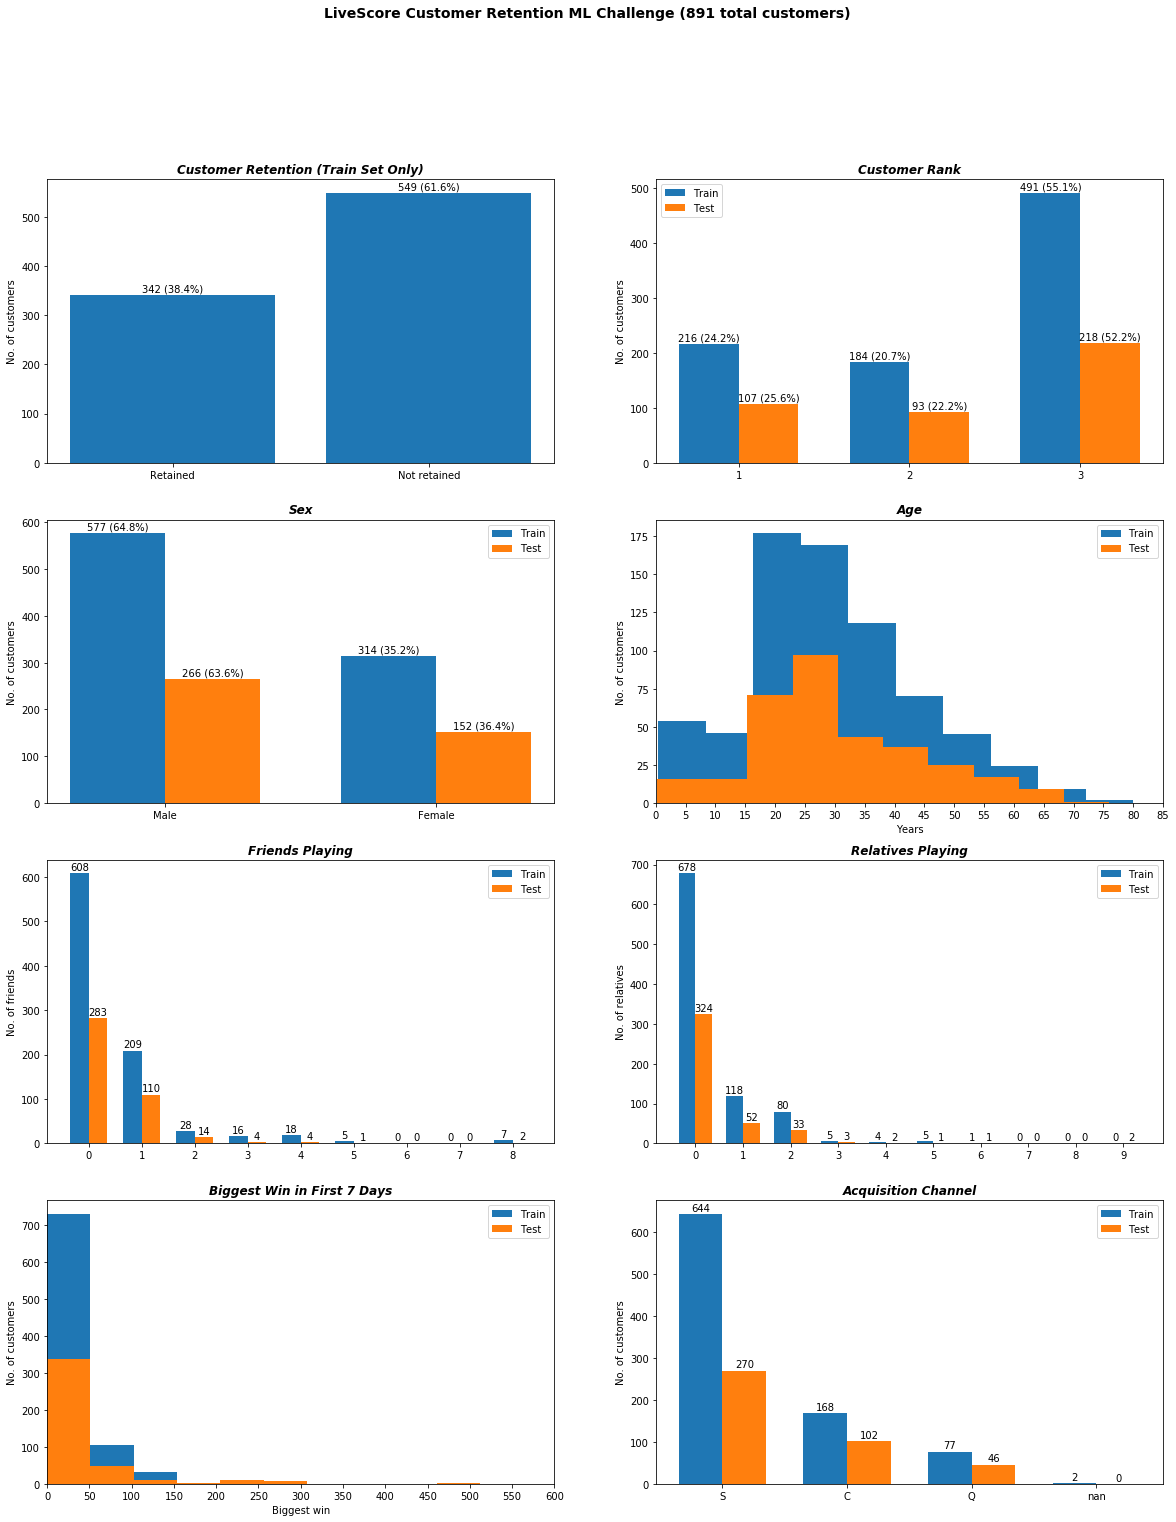

In [6]:
# Visualise the dataset
fig, axs = plt.subplots(4, 2, figsize=(20,24))
fig.suptitle('LiveScore Customer Retention ML Challenge ({} total customers)'.format(len(train)), weight='semibold', fontsize=14);

# Retained
bar1 = axs[0,0].bar(x=['Retained','Not retained'],
                    height=[len(train[train['Retained']==1]),
                            len(train[train['Retained']==0])])
axs[0,0].set_title('Customer Retention (Train Set Only)', style='italic', weight='semibold')
axs[0,0].set_ylabel('No. of customers');

# Customer rank
labels = ['1','2','3']
x = np.arange(len(labels))
width = 0.35
bar2a = axs[0,1].bar(x-width/2,
                     [len(train[train['CuRank']==1]),
                      len(train[train['CuRank']==2]),
                      len(train[train['CuRank']==3])],
                     width,
                     label='Train')
bar2b = axs[0,1].bar(x+width/2,
                     [len(test[test['CuRank']==1]),
                      len(test[test['CuRank']==2]),
                      len(test[test['CuRank']==3])],
                     width,
                     label='Test')
axs[0,1].set_title('Customer Rank', style='italic', weight='semibold')
axs[0,1].set_xticks(x)
axs[0,1].set_xticklabels(labels)
axs[0,1].set_ylabel('No. of customers')
axs[0,1].legend(loc='upper left');

# Sex
labels = ['Male','Female']
x = np.arange(len(labels))
width = 0.35
bar3a = axs[1,0].bar(x-width/2,
                     [len(train[train['Sex']=='male']),
                      len(train[train['Sex']=='female'])],
                     width, \
                     label='Train')
bar3b = axs[1,0].bar(x+width/2,
                     [len(test[test['Sex']=='male']),
                      len(test[test['Sex']=='female'])],
                     width,
                     label='Test')
axs[1,0].set_title('Sex', style='italic', weight='semibold')
axs[1,0].set_xticks(x)
axs[1,0].set_xticklabels(labels)
axs[1,0].set_ylabel('No. of customers')
axs[1,0].legend(loc='upper right');

# Age
axs[1,1].hist(x=train['Age'].dropna(), label='Train')
axs[1,1].hist(x=test['Age'].dropna(), label='Test')
axs[1,1].set_title('Age', style='italic', weight='semibold')
axs[1,1].set_xlim([0,85])
axs[1,1].set_xticks(range(0,86,5))
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('No. of customers')
axs[1,1].legend(loc='upper right');

# Friends playing
labels = ['0','1','2','3','4','5','6','7','8']
x = np.arange(len(labels))
width = 0.35
bar4a = axs[2,0].bar(x-width/2,
                    [len(train[train['FriPlay']==0]),
                     len(train[train['FriPlay']==1]),
                     len(train[train['FriPlay']==2]),
                     len(train[train['FriPlay']==3]),
                     len(train[train['FriPlay']==4]),
                     len(train[train['FriPlay']==5]),
                     len(train[train['FriPlay']==6]),
                     len(train[train['FriPlay']==7]),
                     len(train[train['FriPlay']==8])],
                    width,
                    label='Train')
bar4b = axs[2,0].bar(x+width/2,
                    [len(test[test['FriPlay']==0]),
                     len(test[test['FriPlay']==1]),
                     len(test[test['FriPlay']==2]),
                     len(test[test['FriPlay']==3]),
                     len(test[test['FriPlay']==4]),
                     len(test[test['FriPlay']==5]),
                     len(test[test['FriPlay']==6]),
                     len(test[test['FriPlay']==7]),
                     len(test[test['FriPlay']==8])],
                    width,
                    label='Test')
axs[2,0].set_title('Friends Playing', style='italic', weight='semibold')
axs[2,0].set_xticks(x)
axs[2,0].set_xticklabels(labels)
axs[2,0].set_ylabel('No. of friends')
axs[2,0].legend(loc='upper right');

# Relatives playing
labels = ['0','1','2','3','4','5','6','7','8','9']
x = np.arange(len(labels))
width = 0.35
bar5a = axs[2,1].bar(x-width/2,
                    [len(train[train['RelPlay']==0]),
                     len(train[train['RelPlay']==1]),
                     len(train[train['RelPlay']==2]),
                     len(train[train['RelPlay']==3]),
                     len(train[train['RelPlay']==4]),
                     len(train[train['RelPlay']==5]),
                     len(train[train['RelPlay']==6]),
                     len(train[train['RelPlay']==7]),
                     len(train[train['RelPlay']==8]),
                     len(train[train['RelPlay']==9])],
                    width,
                    label='Train')
bar5b = axs[2,1].bar(x+width/2,
                    [len(test[test['RelPlay']==0]),
                     len(test[test['RelPlay']==1]),
                     len(test[test['RelPlay']==2]),
                     len(test[test['RelPlay']==3]),
                     len(test[test['RelPlay']==4]),
                     len(test[test['RelPlay']==5]),
                     len(test[test['RelPlay']==6]),
                     len(test[test['RelPlay']==7]),
                     len(test[test['RelPlay']==8]),
                     len(test[test['RelPlay']==9])],
                    width,
                    label='Test')
axs[2,1].set_title('Relatives Playing', style='italic', weight='semibold')
axs[2,1].set_xticks(x)
axs[2,1].set_xticklabels(labels)
axs[2,1].set_ylabel('No. of relatives')
axs[2,1].legend(loc='upper right');

# Highest win
axs[3,0].hist(x=train['HighWin'].dropna(), label='Train')
axs[3,0].hist(x=test['HighWin'].dropna(), label='Test')
axs[3,0].set_title('Biggest Win in First 7 Days', style='italic', weight='semibold')
axs[3,0].set_xlim([0,600])
axs[3,0].set_xticks(range(0,601,50))
axs[3,0].set_xlabel('Biggest win')
axs[3,0].set_ylabel('No. of customers')
axs[3,0].legend(loc='upper right');

# Acquisition channel
labels = ['S','C','Q','nan']
x = np.arange(len(labels))
width = 0.35
bar6a = axs[3,1].bar(x-width/2,
                     [len(train[train['AqChan']=='S']),
                      len(train[train['AqChan']=='C']),
                      len(train[train['AqChan']=='Q']),
                      len(train[train['AqChan'].isna()])],
                     width,
                     label='Train')
bar6b = axs[3,1].bar(x+width/2,
                     [len(test[test['AqChan']=='S']),
                      len(test[test['AqChan']=='C']),
                      len(test[test['AqChan']=='Q']),
                      len(test[test['AqChan'].isna()])],
                     width,
                     label='Test')
axs[3,1].set_title('Acquisition Channel', style='italic', weight='semibold')
axs[3,1].set_xticks(x)
axs[3,1].set_xticklabels(labels)
axs[3,1].set_ylabel('No. of customers')
axs[3,1].legend(loc='upper right');

# Add a text labels above bars in bar charts
def autolabel(rects,dataset,percentage=True):
    """Attach a text label above each bar in *rects*, displaying its height."""
    # Define dictionary for where the different subplots are
    bar_location = {
        bar1: axs[0,0], bar2a: axs[0,1], bar3a: axs[1,0], bar4a: axs[2,0], bar5a: axs[2,1], bar6a: axs[3,1],
        bar2b: axs[0,1], bar3b: axs[1,0], bar4b: axs[2,0], bar5b: axs[2,1], bar6b: axs[3,1]
    }
    
    # Iterate over every bar in a given chart
    for rect in rects:
        height = rect.get_height()
        # Declare whether to include percentages or not
        if percentage==True:
            text = '{} ({:.1f}%)'.format(height, 100*height/len(dataset))
        else:
            text = '{}'.format(height)
        bar_location[rects].annotate('{}'.format(text),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

for bars in [bar1,bar2a,bar3a]:
    autolabel(bars,train,percentage=True)
    
for bars in [bar4a,bar5a,bar6a]:
    autolabel(bars,train,percentage=False)

for bars in [bar2b,bar3b]:
    autolabel(bars,test,percentage=True)
    
for bars in [bar4b,bar5b,bar6b]:
    autolabel(bars,train,percentage=False)

In [7]:
# Save to dfs.npy
if not os.path.exists('./data'):
    os.makedirs('./data')

tosave = {'train': train, 'test': test}
np.save('data/dfs.npy',tosave)
print("Saved!")

Saved!
